In [1]:
from prolint2 import Universe

/Users/danielramirez/mambaforge/envs/prolint2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from prolint2.sampledata import GIRKDataSample
GIRK = GIRKDataSample()
u = Universe(GIRK.coordinates, GIRK.trajectory)

In [3]:
contacts = u.compute_contacts(cutoff=7)

100%|██████████| 1251/1251 [00:02<00:00, 444.90it/s]


In [4]:
u.query.residues.resids

array([   1,    2,    3, ..., 1282, 1283, 1284])

In [5]:
from prolint2.metrics.metrics import Metric, MeanMetric, SumMetric, MaxMetric

mean_instance = MeanMetric()
metric_instance = Metric(contacts, mean_instance)
mean_contacts = metric_instance.compute()

#### Residue Plot

In [6]:
from prolint2.plot.plot_1d import ResiduePlot

RP = ResiduePlot(u, mean_contacts, lipid='CHOL', metric_name='MeanMetric')

Fontconfig warning: ignoring UTF-8: not a valid region tag


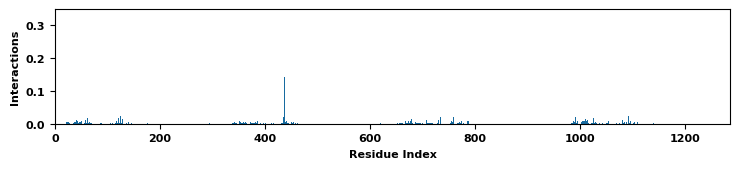

In [7]:
RP.save_plot()

In [8]:
RP.generate_script(ResiduePlot, script_filename='plot_residue.py')

#### Residue Logo

In [9]:
from prolint2.plot.plot_1d import ResidueLogo
RL = ResidueLogo(u, mean_contacts, lipid='CHOL', metric_name='MeanMetric')

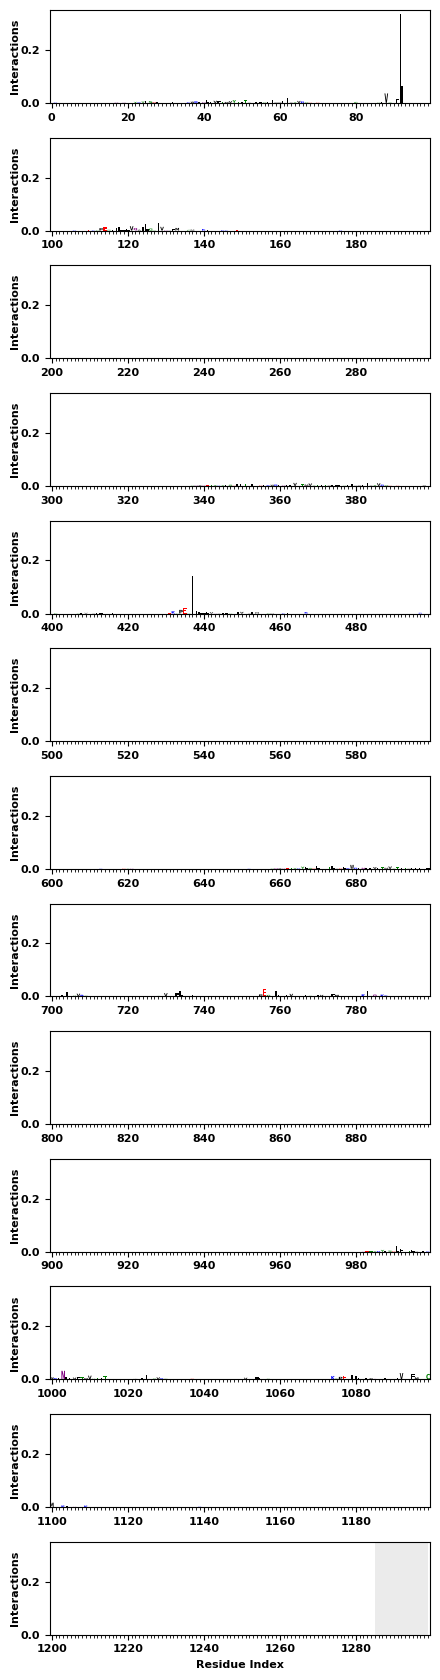

In [10]:
RL.save_plot()

In [11]:
RL.generate_script(ResidueLogo, script_filename='plot_logo.py')

#### Point distributions

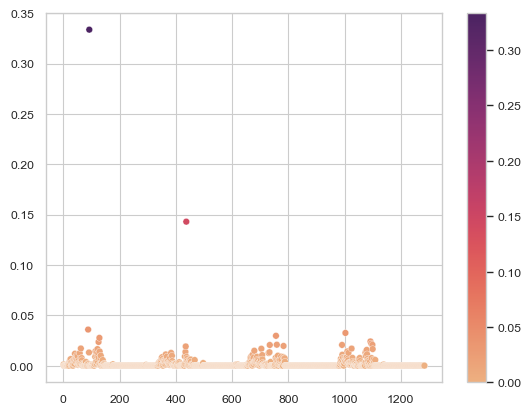

In [12]:
from prolint2.plot.plp import PointDistribution
PD = PointDistribution(u, mean_contacts, lipid='CHOL', metric_name='MeanMetric')
PD.save_plot()

In [13]:
PD.generate_script(PointDistribution, "point_distribution.py")

#### Radar Plot

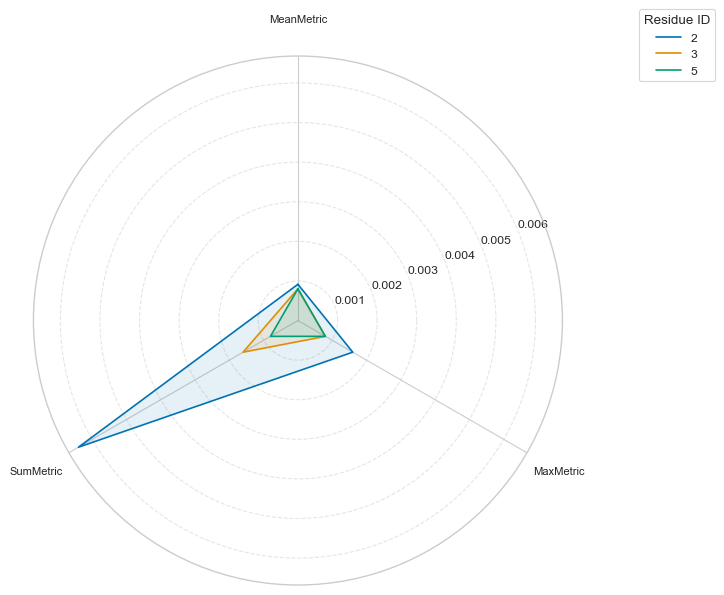

In [14]:
from prolint2.plot.plp import Radar
metric_instances_list = [MeanMetric(), SumMetric(), MaxMetric()]
metric_instance = Metric(contacts, metric_instances_list) # clear is True by default so we clear any existing metrics
contacts_out = metric_instance.compute() # populate the metric columns

RAD = Radar(contacts_out, resIDs=[2, 3, 5], lipid='POPS', metric_names=['MeanMetric', 'SumMetric', 'MaxMetric'])
RAD.save_plot()

In [15]:
RAD.generate_script(Radar, "radar.py")

In [16]:
# from prolint2.plot.test import create_impressive_plot, generate_script_from_function

# data_structure = {
#     'x_data': [1, 2, 3, 4, 5],
#     'y_data': [10, 20, 15, 25, 30],
#     'labels': 'Data Series 1',
# }

# # Generate the plot
# create_impressive_plot(data_structure)

# # Generate the Python script to reproduce the plot
# generate_script_from_function(create_impressive_plot, data_structure, "reproduce_plot.py")

In [17]:
# from prolint2.metrics.metrics import Metric, MeanMetric, SumMetric, MaxMetric

# mean_instance = MeanMetric()
# metric_instance = Metric(contacts, mean_instance)
# mean_contacts = metric_instance.compute()
# mean_contacts

In [18]:
# u.database.unique_resnames

In [19]:
# from prolint2.plot.plot_1d import get_metric_list_by_residues, plot_residue_data

# tt = get_metric_list_by_residues(u, mean_contacts, lipid='CHOL', metric_name='MeanMetric')

In [20]:
# tt

In [21]:
# plot_residue_data(u, tt)